In [2]:
import math

#questions 3/4
def factorielle(n):
    if n==0:
        return 1
    return n*factorielle(n-1)

def binom(n,k):
    if k>n:
        return 0
    return factorielle(n)/(factorielle(k)*factorielle(n-k))

def f_4(x):
    return max(x -110, 0)
    
def pricer_1(N, r_N, h_N, b_N, s, f):
    q_N = (r_N-b_N)/(h_N-b_N)
    somme=0
    for k in range(0,N+1):
        somme += binom(N,k)*f(((1+h_N)**k)*((1+b_N)**(N-k))*s)*(q_N**k)*((1-q_N)**(N-k))
    prix_binom = somme/((1+r_N)**N)
    return prix_binom

N = 20
r_N = 0.02
h_N = 0.05
b_N = -0.05
s = 100

pricer_1(N, r_N, h_N, b_N, s, f_4)

26.616941360258558

In [3]:
#questions 5-6

def f_5(x):
    return max(x -100, 0)

def pricer_2(N, r_N, h_N, b_N, s, f):
    #vecteur sous forme de liste contenant tous les V_j
    V = []
    #calcul de q_N
    q_N = (r_N - b_N)/(h_N - b_N)
    #construction du vecteur V_N, sous forme d'une liste Python
    V_N = []
    for i in range(0, N+1):
        V_N.append(f(s * ((1 + h_N)**(N-i)) * ((1 + b_N)**i)))
    V.append(V_N)
    #on descend successivement jusqu'à V_0 en N étapes
    for j in range(0, N):
        V_j = []
        for k in range(0, N-j):
            V_j.append((q_N * V[-1][k] + (1 - q_N) * V[-1][k+1]) / (1 + r_N))
        V.append(V_j)
    return V[-1][0]

pricer_2(3, 0.02, 0.05, -0.05, 100, f_5)

7.063436197239379

In [4]:
#question 7

import numpy
N = numpy.random.randint(low = 5, high = 15, size = 1)[0]
r_N = 0.01
h_N = 0.05
b_N = -0.05
s = 100

p1 = pricer_1(N, r_N, h_N, b_N, s, f_4)
p2 = pricer_2(N, r_N, h_N, b_N, s, f_4)
print(abs(p1-p2))

7.105427357601002e-15


In [5]:
#question 8

N=2
s=100
r=0.03
h=0.05
b=-0.05
#calcul de alpha_0 et beta_0

q = (r - b)/(h - b)
vsh = (f_5(s*(1+h)**2)*q + f_5(s*(1+h)*(1+b))*(1-q))/(1+r)
vsb = (f_5(s*(1+h)*(1+b))*q + f_5(s*(1+b)**2)*(1-q))/(1+r)
a0 = (vsh - vsb)/(s*(h-b))
b0 = (vsb * (1+h) - vsh * (1+b))/((h-b)*(1+r))

#calcul de alpha_1 et beta_1

#cas (1+h)
a1 = (f_5(s*(1+h)**2) - f_5(s*(1+b)*(1+h)))/(s*(1+h)*(h-b))
b1 = (f_5(s*(1+b)*(1+h))*(1+h) - f_5(s*(1+h)**2)*(1+b))/((h-b)*(1+r)**2)

#cas (1+b)
a2 = (f_5(s*(1+h)*(1+b)) - f_5(s*(1+b)**2))/(s*(1+b)*(h-b))
b2 = (f_5(s*(1+b)**2)*(1+h) - f_5(s*(1+h)*(1+b))*(1+b))/((h-b)*(1+r)**2)

print("alpha_0 = ", a0)
print("beta_0 =", b0)
print("alpha_1_cas(1+h) =", a1) 
print("beta_1_cas(1+h) =", b1)
print("alpha_1_cas(1+b) =", a2)
print("beta_1_cas(1+b) =", b2)

alpha_0 =  0.7961165048543688
beta_0 = -73.42822132151944
alpha_1_cas(1+h) = 0.9761904761904762
beta_1_cas(1+h) = -91.78527665189932
alpha_1_cas(1+b) = 0.0
beta_1_cas(1+b) = 0.0


In [6]:
import random
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib import cm

#Question 12

def pricer_MC(n,s,r,sigma,T,f):
    EchXi = sps.norm.rvs(0,1,n)
    sum = 0
    for i in range(0,n):
        sum += f(s*math.exp(T*(r-(sigma**2)/2) + sigma*math.sqrt(T)*EchXi[i]))
    return (math.exp(-r*T)) * sum/n


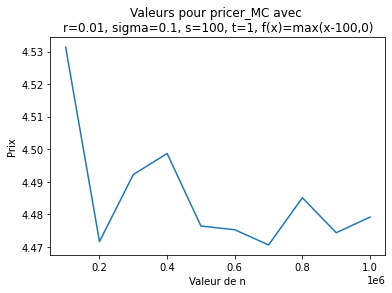

In [7]:
#Question13

r=0.01
sigma=0.1
s=100
T=1

def fPricer13(x):
	return max(x-100,0)

n = (10**5)*numpy.arange(1,11)

resPMC13 = [pricer_MC(i,s,r,sigma,T,fPricer13) for i in n]

plt.plot(n,resPMC13)
plt.xlabel('Valeur de n')
plt.ylabel('Prix')
plt.title('Valeurs pour pricer_MC avec \nr=0.01, sigma=0.1, s=100, t=1, f(x)=max(x-100,0)')
plt.show()

In [8]:
#Question15

def put_BS(s,r,sigma,T,K):
    d1 = (1/(sigma*math.sqrt(T)))*(math.log(s/K)+(T*(r+((sigma**2)/2))))
    d2 = d1 - (sigma*math.sqrt(T))
    return ((-s*sps.norm.cdf(-d1,0,1))+(K*math.exp(-r*T)*sps.norm.cdf(-d2,0,1)))
#sps.norm.cdf(x,mu,sigma) renvoie P(Y<=x) pour Y qui suit la loi de normale d'espérance mu et d'écart-type sigma
#Ici, on se contente d'appliquer les formules de l'énoncé pour définir nos fonctions

In [9]:
#Question16

r=0.01
sigma=0.1
s=100
T=1
K=90

resBS = put_BS(s,r,sigma,T,K)
print("En appliquant notre fonction à l'exemple donné, put_BS renvoie ",resBS)

En appliquant notre fonction à l'exemple donné, put_BS renvoie  0.5815000751362422


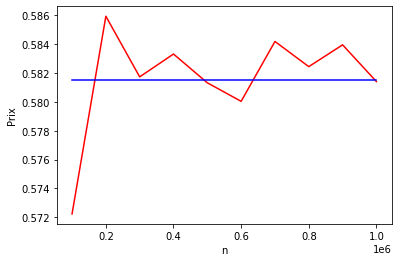

In [10]:
#Question17

r=0.01
sigma=0.1
s=100
T=1
K=90

def fPricer17(x):
	return max(90-x,0)

resPMC17 = [pricer_MC(i,s,r,sigma,T,fPricer17) for i in n]
resBS17 = [resBS for i in range(1,11)]

plt.plot(n,resPMC17, color='red')
plt.plot(n,resBS17, color='blue')
plt.xlabel('n')
plt.ylabel('Prix')
plt.show()

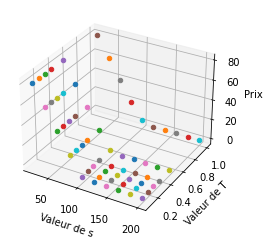

In [11]:
#Question18

r=0.01
sigma=0.1
K=100


sList = [20*i for i in range(1,11)]
TList = [1/12,1/6,1/4,1/3,1/2,1]

fig = plt.figure()
plot3D = fig.add_subplot(projection='3d')

for i in range(10):
    for j in range(6):
        plot3D.scatter(sList[i],TList[j],put_BS(sList[i],r,sigma,TList[j],K))

plot3D.set_xlabel('Valeur de s')
plot3D.set_ylabel('Valeur de T')
plot3D.set_zlabel('Prix')
plt.show()